In [1]:
### Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# read and show initial data insights:
df = pd.read_excel(r"Loan_Modelling.xlsx")
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print(df.shape)
display(df.head())
df.info()

(5000, 14)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Quality Check



In [5]:
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df["Experience"] = df["Experience"].clip(lower=0)


In [7]:
df["Personal_Loan"].value_counts(dropna=False)
df["Personal_Loan"].value_counts(normalize=True)


Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

### Feature distrebution:

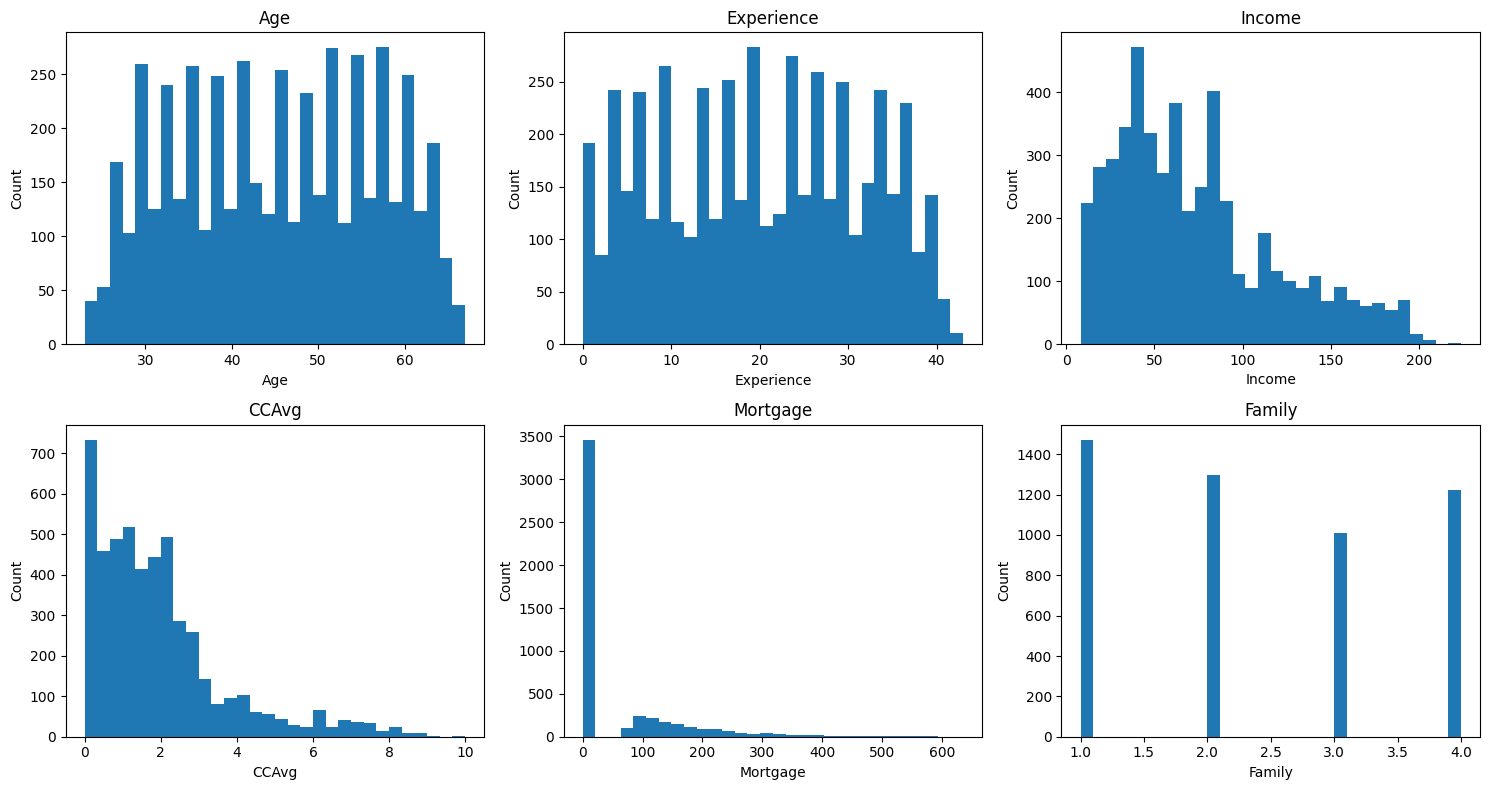

In [8]:


num_cols = ["Age","Experience","Income","CCAvg","Mortgage","Family"]
ncols = 3
nrows = math.ceil(len(num_cols)/ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Relationship plots

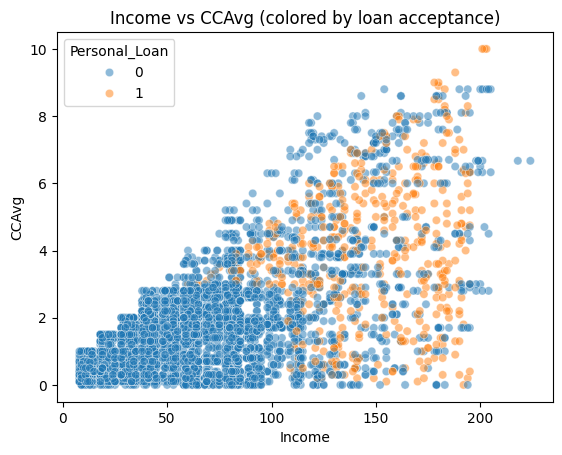

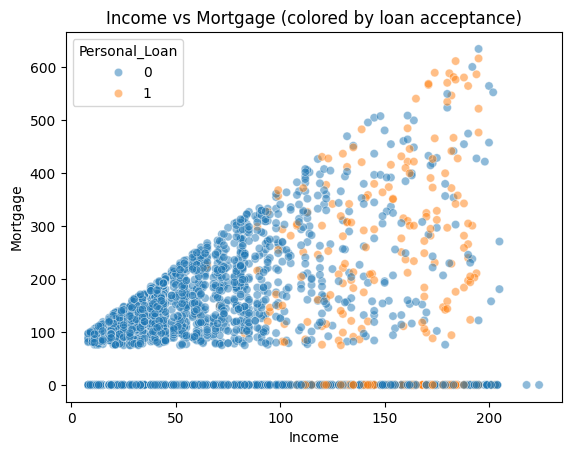

In [9]:


sns.scatterplot(data=df, x="Income", y="CCAvg", hue="Personal_Loan", alpha=0.5)
plt.title("Income vs CCAvg (colored by loan acceptance)")
plt.show()

sns.scatterplot(data=df, x="Income", y="Mortgage", hue="Personal_Loan", alpha=0.5)
plt.title("Income vs Mortgage (colored by loan acceptance)")
plt.show()


================
=================


In [10]:
# Loan acceptance rate by categorical / binary features
group_cols = ["Education","Family","CD_Account","Securities_Account","Online","CreditCard"]

for c in group_cols:
    summary = df.groupby(c)["Personal_Loan"].agg(
        acceptance_rate="mean",
        accepted="sum",
        total="count"
    ).sort_values("acceptance_rate", ascending=False)
    print("\n", c)
    display(summary)



 Education


,acceptance_rate,accepted,total
Education,,,
3,0.136576,205,1501
2,0.129722,182,1403
1,0.044370,93,2096



 Family


,acceptance_rate,accepted,total
Family,,,
3,0.131683,133,1010
4,0.109656,134,1222
2,0.081790,106,1296
1,0.072690,107,1472



 CD_Account


,acceptance_rate,accepted,total
CD_Account,,,
1,0.463576,140,302
0,0.072371,340,4698



 Securities_Account


,acceptance_rate,accepted,total
Securities_Account,,,
1,0.114943,60,522
0,0.093792,420,4478



 Online


,acceptance_rate,accepted,total
Online,,,
1,0.09752,291,2984
0,0.09375,189,2016



 CreditCard


,acceptance_rate,accepted,total
CreditCard,,,
1,0.097279,143,1470
0,0.095467,337,3530


### Loan acceptance by Income bins (business-friendly)

Income_bin
(7.999, 39.0]    0.000000
(39.0, 64.0]     0.001616
(64.0, 98.0]     0.028239
(98.0, 224.0]    0.356340
Name: Personal_Loan, dtype: float64

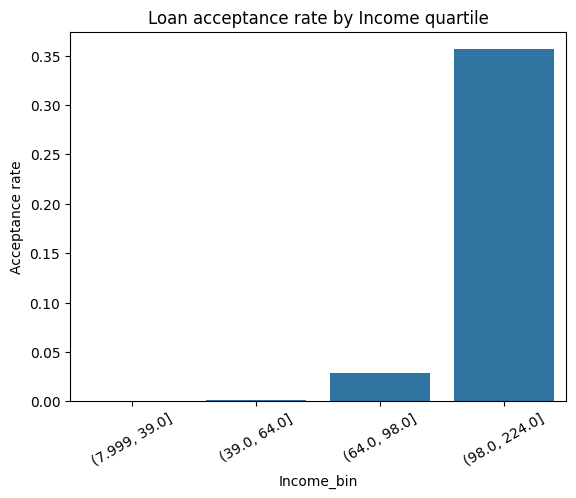

In [11]:
df["Income_bin"] = pd.qcut(df["Income"], q=4, duplicates="drop")

income_rate = df.groupby("Income_bin")["Personal_Loan"].mean()
display(income_rate)

sns.barplot(x=income_rate.index.astype(str), y=income_rate.values)
plt.xticks(rotation=30)
plt.ylabel("Acceptance rate")
plt.title("Loan acceptance rate by Income quartile")
plt.show()


CCAvg_bin
(-0.001, 0.7]    0.028240
(0.7, 1.5]       0.034392
(1.5, 2.5]       0.032336
(2.5, 10.0]      0.290064
Name: Personal_Loan, dtype: float64

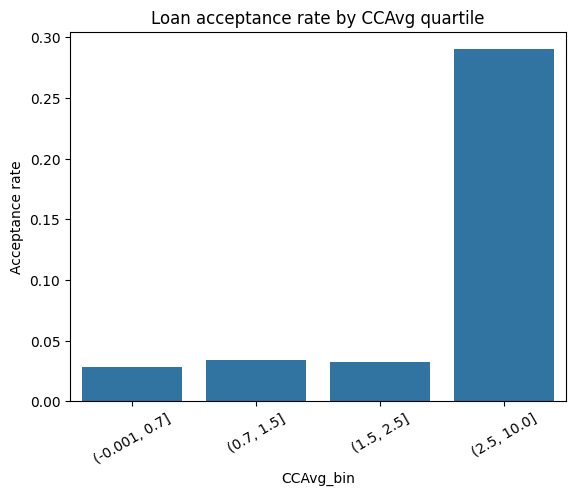

In [12]:
# Loan acceptance by CCAvg bins (very relevant to the brief)
df["CCAvg_bin"] = pd.qcut(df["CCAvg"], q=4, duplicates="drop")

cc_rate = df.groupby("CCAvg_bin")["Personal_Loan"].mean()
display(cc_rate)

sns.barplot(x=cc_rate.index.astype(str), y=cc_rate.values)
plt.xticks(rotation=30)
plt.ylabel("Acceptance rate")
plt.title("Loan acceptance rate by CCAvg quartile")
plt.show()


_
___

## Modelling:


In [16]:
num_features = [
    "Age", "Experience", "Income", "Family", "Mortgage",
    "Securities_Account", "CD_Account", "Online", "CreditCard"
]
cat_features = ["Education"]


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [18]:
# Preprocessing pipeline
preprocess_reg = ColumnTransformer(
    transformers=[
        ("num",
         Pipeline([
             ("imputer", SimpleImputer(strategy="median")),
             ("scaler", StandardScaler())
         ]),
         num_features
        ),
        ("cat",
         OneHotEncoder(handle_unknown="ignore"),
         cat_features
        )
    ]
)


In [19]:
# BASELINE model (Ridge Regression)
from sklearn.linear_model import Ridge
reg_model = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", Ridge(alpha=1.0))
])


In [24]:
# Train and evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train
reg_model.fit(Xr_train, yr_train)

# Predict
pred_reg = reg_model.predict(Xr_test)

# Metrics (version-safe)
mse = mean_squared_error(yr_test, pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, pred_reg)

rmse, r2


(np.float64(1.3004480609359879), 0.4413536930270119)

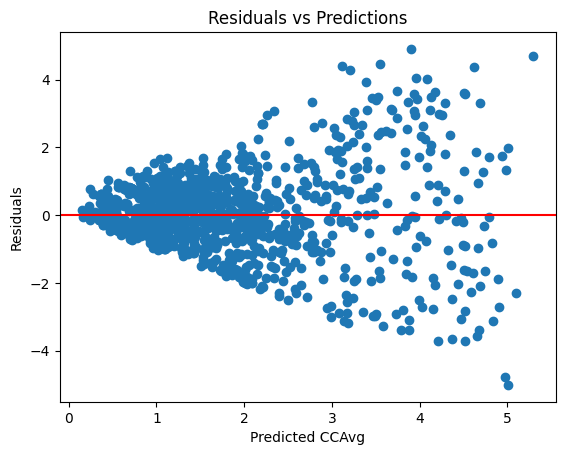

In [25]:
#Residual diagnostics

import matplotlib.pyplot as plt

residuals = yr_test - pred_reg

plt.scatter(pred_reg, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted CCAvg")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


#### Regression for the Targert CCAvg: creit card average spending per month (business-friendly)<br>
“Given customer demographics and financial information, what is the expected monthly credit card spending?”

In [28]:

TARGET_REG = "CCAvg"
DROP_ALWAYS = ["ID", "ZIPCode", "Personal_Loan"]

X_reg = df.drop(columns=DROP_ALWAYS + [TARGET_REG])
y_reg = df[TARGET_REG]


In [30]:
# Train_test split:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)



In [31]:
num_features = [
    "Age", "Experience", "Income", "Family", "Mortgage",
    "Securities_Account", "CD_Account", "Online", "CreditCard"
]
cat_features = ["Education"]


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


down: Handles missing values safely

Scales numeric features

Encodes categorical variables

Prevents leakage

Is reusable for any regression

In [33]:
preprocess_reg = ColumnTransformer(
    transformers=[
        ("num",
         Pipeline([
             ("imputer", SimpleImputer(strategy="median")),
             ("scaler", StandardScaler())
         ]),
         num_features
        ),
        ("cat",
         OneHotEncoder(handle_unknown="ignore"),
         cat_features
        )
    ]
)


Regrssion becasue it is numerical target variable, and we want to predict the average spending per month (CCAvg) based on customer demographics and financial information. Regression models are suitable for this task as they can capture the relationship between the features and the continuous target variable, allowing us to make accurate predictions of monthly credit card spending.

In [34]:
from sklearn.linear_model import Ridge
reg_model = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", Ridge(alpha=1.0))
])


In [35]:
# Train the regression model
reg_model.fit(Xr_train, yr_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [36]:
# predict and evaluate:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

pred_reg = reg_model.predict(Xr_test)

mse = mean_squared_error(yr_test, pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, pred_reg)

rmse, r2


(np.float64(1.3004480609359879), 0.4413536930270119)

RMSE

“On average, how far off is my prediction?” $1.3k per month is the average error in our predictions. This means that, on average, our model's predictions of monthly credit card spending are off by $1.3k. While
1.3 is not great, but it is a start. We can improve this with more complex models and better feature engineering.

R²

“How much of spending behaviour can I explain?”
0.44 is not great, but it is a start. We can improve this with more complex models and better feature engineering.

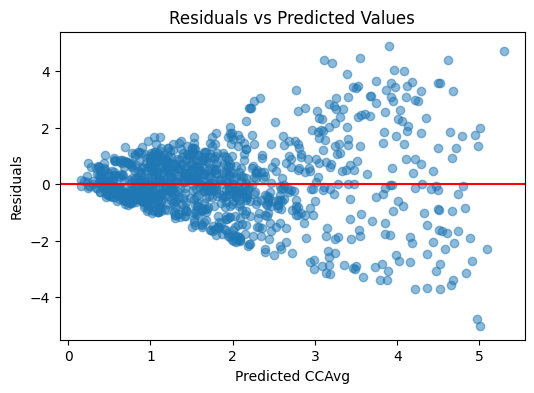

In [37]:
#Dignostics:
import matplotlib.pyplot as plt

residuals = yr_test - pred_reg

plt.figure(figsize=(6,4))
plt.scatter(pred_reg, residuals, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted CCAvg")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


A clear funnel shape
Residual spread increases as predicted CCAvg increases
Errors are small for low spenders, large for high spender. 
(Heteroscedasticity)
The variance of errors is not constant.The model struggles more for high-spending customers.

A linear Ridge regression explains a moderate proportion of variance in credit card spending; however, residual diagnostics reveal heteroscedasticity, particularly among high-spending customers, suggesting that a transformation of the target variable or a non-linear model may improve performance.”

____________________________
log transformation of the target variable to stabilize variance and improve model performance. This can help address the heteroscedasticity observed in the residuals, particularly for high-spending customers.



In [39]:


y_reg_log = np.log1p(df["CCAvg"])


In [40]:
Xr_train, Xr_test, yr_train_log, yr_test_log = train_test_split(
    X_reg,
    y_reg_log,
    test_size=0.2,
    random_state=42
)


In [41]:
reg_model_log = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", Ridge(alpha=1.0))
])


In [42]:
reg_model_log.fit(Xr_train, yr_train_log)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [43]:
pred_log = reg_model_log.predict(Xr_test)


In [ ]:
# back-transform predictions and true values to original scale for evaluation

pred_ccavg = np.expm1(pred_log)
true_ccavg = np.expm1(yr_test_log)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

mse_log = mean_squared_error(true_ccavg, pred_ccavg)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(true_ccavg, pred_ccavg)

rmse_log, r2_log


(np.float64(1.3616115462241), 0.38756872560891886)

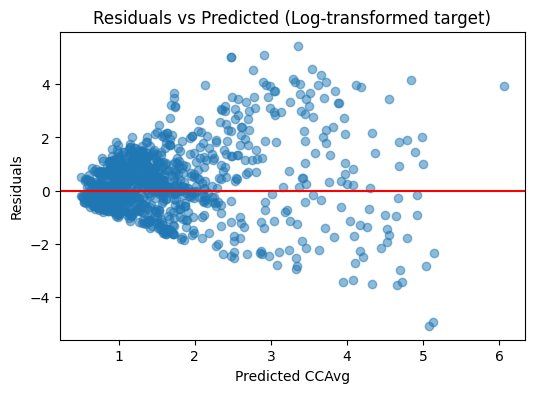

In [47]:
residuals_log = true_ccavg - pred_ccavg

plt.figure(figsize=(6,4))
plt.scatter(pred_ccavg, residuals_log, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted CCAvg")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Log-transformed target)")
plt.show()


________
______
_________
_______


### Tree-based regression for the Targert CCAvg: creit card average spending per month (business-friendly)<br>
“Given customer demographics and financial information, what is the expected monthly credit card spending?”

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

tree_reg = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", DecisionTreeRegressor(
        max_depth=6,
        random_state=42
    ))
])

tree_reg.fit(Xr_train, yr_train)

pred_tree = tree_reg.predict(Xr_test)

rmse_tree = np.sqrt(mean_squared_error(yr_test, pred_tree))
r2_tree = r2_score(yr_test, pred_tree)

rmse_tree, r2_tree


(np.float64(1.3400838645569118), 0.4067812555433459)

In [49]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=20,
        random_state=42,
        n_jobs=-1
    ))
])

rf_reg.fit(Xr_train, yr_train)

pred_rf = rf_reg.predict(Xr_test)

rmse_rf = np.sqrt(mean_squared_error(yr_test, pred_rf))
r2_rf = r2_score(yr_test, pred_rf)

rmse_rf, r2_rf


(np.float64(1.271691635774517), 0.46578689344169233)

In [50]:
# Gradient Boosting Regressor (classical boosting)

from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbr_reg.fit(Xr_train, yr_train)

pred_gbr = gbr_reg.predict(Xr_test)

rmse_gbr = np.sqrt(mean_squared_error(yr_test, pred_gbr))
r2_gbr = r2_score(yr_test, pred_gbr)

rmse_gbr, r2_gbr


(np.float64(1.3103763311447993), 0.4327911619796966)

In [52]:
# xgboost regressor
from xgboost import XGBRegressor

xgb_reg = Pipeline(steps=[
    ("preprocess", preprocess_reg),
    ("model", XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

xgb_reg.fit(Xr_train, yr_train)

pred_xgb = xgb_reg.predict(Xr_test)

rmse_xgb = np.sqrt(mean_squared_error(yr_test, pred_xgb))
r2_xgb = r2_score(yr_test, pred_xgb)

rmse_xgb, r2_xgb


(np.float64(1.308493782686139), 0.43441974923942006)

In [53]:
results = {
    "Ridge": (rmse, r2),
    "Decision Tree": (rmse_tree, r2_tree),
    "Random Forest": (rmse_rf, r2_rf),
    "Gradient Boosting": (rmse_gbr, r2_gbr),
    "XGBoost": (rmse_xgb, r2_xgb)
}

pd.DataFrame(results, index=["RMSE", "R2"]).T


,RMSE,R2
Ridge,1.300448,0.441354
Decision Tree,1.340084,0.406781
Random Forest,1.271692,0.465787
Gradient Boosting,1.310376,0.432791
XGBoost,1.308494,0.434420


In [55]:
df["CCAvg_pred_rf"] = rf_reg.predict(X_reg)
df["CCAvg_pred_xgb"] = xgb_reg.predict(X_reg)


_____
_______
Classification
Which customers are most likely to accept a personal loan?
____
___

In [80]:
df["CCAvg_pred"] = rf_reg.predict(X_reg)


In [81]:
# Classification features:

TARGET_CLF = "Personal_Loan"

DROP_ALWAYS_CLF = ["ID", "ZIPCode", "Personal_Loan","CCAvg"]

X_clf = df.drop(columns=DROP_ALWAYS_CLF)
y_clf = df[TARGET_CLF]


In [82]:
# Train-test split

from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)


In [88]:
# Preprocessing pipeline for classification

num_features_clf = [
    "Age", "Experience", "Income", "Family", "Mortgage",
    "Securities_Account", "CD_Account", "Online", "CreditCard", "CCAvg_pred"
]

cat_features_clf = ["Education"]

preprocess_clf = ColumnTransformer(
    transformers=[
        ("num",
         Pipeline([
             ("imputer", SimpleImputer(strategy="median")),
             ("scaler", StandardScaler())
         ]),
         num_features_clf
        ),
        ("cat",
         OneHotEncoder(handle_unknown="ignore"),
         cat_features_clf
        )
    ]
)


In [89]:
# Logistic Regression for classification

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_clf = Pipeline(steps=[
    ("preprocess", preprocess_clf),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    ))
])

log_clf.fit(Xc_train, yc_train)

y_pred_log = log_clf.predict(Xc_test)
y_proba_log = log_clf.predict_proba(Xc_test)[:, 1]


In [90]:
# Evaluate Properly:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

print("Confusion Matrix:")
print(confusion_matrix(yc_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(yc_test, y_pred_log))

print("ROC-AUC:", roc_auc_score(yc_test, y_proba_log))
print("PR-AUC:", average_precision_score(yc_test, y_proba_log))


Confusion Matrix:
[[814  90]
 [  8  88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       904
           1       0.49      0.92      0.64        96

    accuracy                           0.90      1000
   macro avg       0.74      0.91      0.79      1000
weighted avg       0.94      0.90      0.91      1000

ROC-AUC: 0.9646248156342183
PR-AUC: 0.8346648380265723


In [94]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ("preprocess", preprocess_clf),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    ))
])

rf_clf.fit(Xc_train, yc_train)

y_train_pred_rf = rf_clf.predict(Xc_train)
y_test_pred_rf = rf_clf.predict(Xc_test)
#y_pred_rf = rf_clf.predict(Xc_test)
#y_proba_rf = rf_clf.predict_proba(Xc_test)[:, 1]
#print random train and test classification report and metrics
print("Classification Report (Train):\n", classification_report(yc_train, y_train_pred_rf))
print("Classification Report (Test):\n", classification_report(yc_test, y_test_pred_rf)) 
## overfitting



Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3616
           1       0.98      0.82      0.89       384

    accuracy                           0.98      4000
   macro avg       0.98      0.91      0.94      4000
weighted avg       0.98      0.98      0.98      4000

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.96      0.89      0.92        96

    accuracy                           0.98      1000
   macro avg       0.97      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [95]:
pos_count= (yc_train==1).sum()
neg_count= (yc_train==0).sum()
scale_pos_weight = neg_count / pos_count if pos_count > 0 else 1.0

# tells us if the classes are imbalanced or not
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")

Scale Pos Weight: 9.42


In [114]:
#XGBoost Classifier
from xgboost import XGBClassifier

xgb = Pipeline(steps=[
    ("preprocess", preprocess_clf),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=5,  # handle imbalance
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        feature_importances_type="gain",
        feature_names=preprocess_clf.get_feature_names_out()
    ))
])

xgb.fit(Xc_train, yc_train)
y_train_pred_xgb = xgb.predict(Xc_train)
y_test_pred_xgb = xgb.predict(Xc_test)
y_proba_xgb = xgb.predict_proba(Xc_test)[:, 1]

model = xgb.named_steps["model"]

feature_importances = model.feature_importances_
feature_names = xgb.named_steps["preprocess"].get_feature_names_out()

indices = np.argsort(feature_importances)


print("Classification Report (Train):\n", classification_report(yc_train, y_train_pred_xgb))
print("Classification Report (Test):\n", classification_report(yc_test, y_test_pred_xgb))


print("ROC-AUC:", roc_auc_score(yc_test, y_proba_xgb))
print("PR-AUC:", average_precision_score(yc_test, y_proba_xgb))



c:\Users\alaae\itc\Week 2\Group Project\.venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [09:26:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "feature_importances_type", "feature_names", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       0.99      1.00      0.99       384

    accuracy                           1.00      4000
   macro avg       0.99      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       904
           1       0.87      0.94      0.90        96

    accuracy                           0.98      1000
   macro avg       0.93      0.96      0.94      1000
weighted avg       0.98      0.98      0.98      1000

ROC-AUC: 0.9896870390855457
PR-AUC: 0.9655925211486895


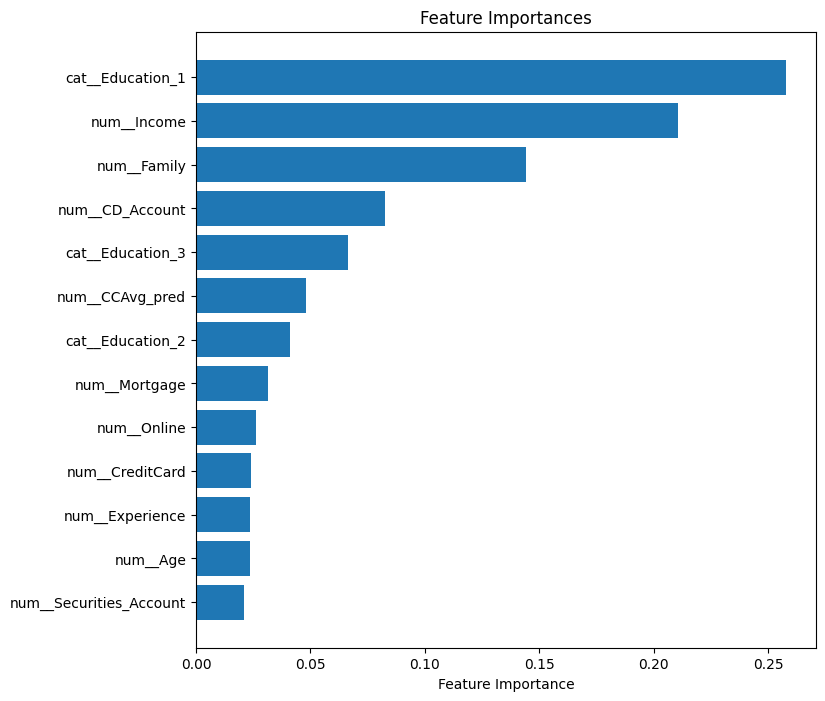

In [117]:
#feature importance plot for xgboost
plt.figure(figsize=(8,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()


In [119]:
#cross-validation for xgboost
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb, X_clf, y_clf, cv=5, scoring="roc_auc")
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC Score: {cv_scores.mean():.4f}")


c:\Users\alaae\itc\Week 2\Group Project\.venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [09:30:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "feature_importances_type", "feature_names", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\alaae\itc\Week 2\Group Project\.venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [09:30:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "feature_importances_type", "feature_names", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\alaae\itc\Week 2\Group Project\.venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [09:30:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "feature_importances_type", "feature_names", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\alaae\itc\Week 2\Group

Cross-Validation AUC Scores: [0.97784154 0.96695243 0.99799502 0.98580383 0.99125415]
Mean CV AUC Score: 0.9840
